# UMAP and PC visualizations

In [2]:
import pandas as pd
import numpy as np

import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Load counts and PCs

In [4]:
adata = sc.read('../data/endoderm_ase.h5ad')
adata

AnnData object with n_obs × n_vars = 34254 × 3966
    obs: 'assigned', 'auxDir', 'cell_filter', 'cell_name', 'compatible_fragment_ratio', 'day', 'donor', 'expected_format', 'experiment', 'frag_dist_length', 'gc_bias_correct', 'is_cell_control', 'is_cell_control_bulk', 'is_cell_control_control', 'library_types', 'libType', 'log10_total_counts', 'log10_total_counts_endogenous', 'log10_total_counts_ERCC', 'log10_total_counts_feature_control', 'log10_total_counts_MT', 'log10_total_features', 'log10_total_features_endogenous', 'log10_total_features_ERCC', 'log10_total_features_feature_control', 'log10_total_features_MT', 'mapping_type', 'mates1', 'mates2', 'n_alt_reads', 'n_total_reads', 'num_assigned_fragments', 'num_bias_bins', 'num_bootstraps', 'num_compatible_fragments', 'num_consistent_mappings', 'num_inconsistent_mappings', 'num_libraries', 'num_mapped', 'num_processed', 'num_targets', 'nvars_used', 'pct_counts_endogenous', 'pct_counts_ERCC', 'pct_counts_feature_control', 'pct_counts_

In [5]:
day_colors = dict(zip(adata.obs['day'].cat.categories, sns.color_palette('viridis')[:4]))

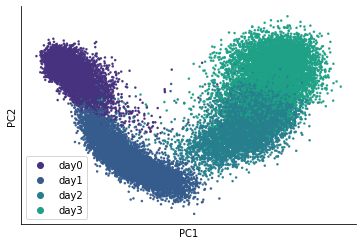

In [6]:
ax = sns.scatterplot(
    x=adata.obsm['X_pca'][:, 0],
    y=adata.obsm['X_pca'][:, 1],
    hue=adata.obs['day'],
    edgecolor=None, s=5, palette=day_colors)
ax.legend(title='')
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='PC1', ylabel='PC2');
sns.despine()

In [7]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

In [8]:
sc.tl.umap(adata, min_dist=0.1)

In [9]:
sc.tl.leiden(adata, resolution=.3)

In [10]:
sc.write('../data/endoderm_ase_processed.h5ad', adata)

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


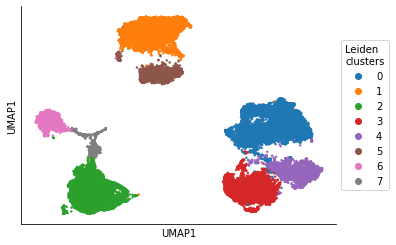

In [13]:
fig, ax = plt.subplots(figsize=(6-0.05*6-0.05, 4))

im = sns.scatterplot(ax=ax,
    x=adata.obsm['X_umap'][:, 0],
    y=adata.obsm['X_umap'][:, 1],
    hue=adata.obs['leiden'],
    s=5, edgecolor=None)
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='UMAP1', ylabel='UMAP1');
plt.legend(title='Leiden\nclusters', loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine();

Visualize selected genes

In [14]:
log_counts = pd.read_csv('../data/log_normalised_counts.csv.zip', index_col=0)[adata.obs_names]

In [15]:
log_counts.iloc[:5, :5]

,23794_3#37,23794_3#36,23794_3#35,23794_3#34,23794_3#33
ENSG00000000003_TSPAN6,5.447130,5.921911,5.425574,5.440539,4.844121
ENSG00000000419_DPM1,6.003484,6.818859,5.716187,5.240385,6.894469
ENSG00000000457_SCYL3,0.041507,4.208975,0.601330,0.000000,0.000306
ENSG00000000460_C1orf112,3.682338,2.798537,1.959400,2.021755,2.551527
ENSG00000001036_FUCA2,4.709096,4.723470,4.763956,5.361772,2.924314


In [16]:
adata.obs['TAC3'] = log_counts.iloc[np.where(log_counts.index.str.contains('TAC3'))[0].item(), :]
adata.obs['UTF1'] = log_counts.iloc[np.where(log_counts.index.str.contains('UTF1'))[0].item(), :]
adata.obs['CPNE1'] = log_counts.iloc[np.where(log_counts.index.str.contains('CPNE1'))[0].item(), :]

In [17]:
sc.write('../data/endoderm_ase_processed.h5ad', adata)

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


## Paper plots

In [28]:
plot_final = True

OUT_RC_PARAMS = {'font.size': 8, 'figure.figsize': (2.8, 2.3)} if plot_final else {}
for k, v in OUT_RC_PARAMS.items():
    plt.rcParams[k] = v

In [14]:
adata = sc.read('../data/endoderm_ase_processed.h5ad')

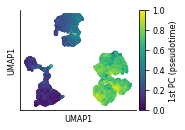

In [51]:
fig, ax = plt.subplots(figsize=(.8 * plt.rcParams['figure.figsize'][0], .8*plt.rcParams['figure.figsize'][1]))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.scatter(
    x=adata.obsm['X_umap'][:, 0],
    y=adata.obsm['X_umap'][:, 1],
    c=adata.obs['pseudo'], rasterized=True,
    s=3, cmap=sns.color_palette('viridis', as_cmap=True))
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='UMAP1', ylabel='UMAP1');

fig.colorbar(im, cax=cax, orientation='vertical', label='1st PC (pseudotime)')
sns.despine()

if plot_final:
    plt.savefig('plots/umap_pseudotime.svg', dpi=300)

In [48]:
adata.obs['window'] = adata.obs['day'].replace({
    'day0': 'iPSC',
    'day1': 'Day 1',
    'day2': 'Day 2',
    'day3': 'Day 3'
}).astype('category').cat.reorder_categories(['iPSC', 'Day 1', 'Day 2', 'Day 3'], ordered=True)

In [49]:
day_colors = dict(zip(adata.obs['window'].cat.categories, sns.color_palette('viridis')[:4]))

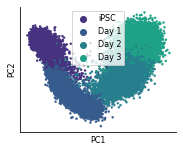

In [50]:
ax = sns.scatterplot(
    x=adata.obsm['X_pca'][:, 0],
    y=adata.obsm['X_pca'][:, 1],
    hue=adata.obs['window'],
    edgecolor=None, s=5, palette=day_colors,
    rasterized=True)
ax.legend(title='')
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='PC1', ylabel='PC2');
sns.despine()

if plot_final:
    plt.savefig('plots/pc_pseudotime.svg', dpi=300)

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


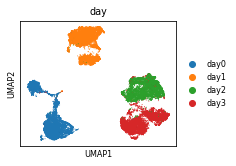

In [26]:
sc.pl.umap(adata, color='day')

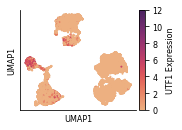

In [27]:
fig, ax = plt.subplots(figsize=(.8 * plt.rcParams['figure.figsize'][0], .8*plt.rcParams['figure.figsize'][1]))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.scatter(
    x=adata.obsm['X_umap'][:, 0],
    y=adata.obsm['X_umap'][:, 1],
    c=adata.obs['UTF1'], rasterized=True,
    s=1, cmap=sns.color_palette('flare', as_cmap=True), vmin=0, vmax=12)
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='UMAP1', ylabel='UMAP1');

fig.colorbar(im, cax=cax, orientation='vertical', label='UTF1 Expression')
sns.despine()

if plot_final:
    plt.savefig('plots/umap_UTF1_exprs.svg', dpi=300)

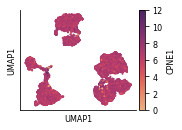

In [23]:
fig, ax = plt.subplots(figsize=(.8 * plt.rcParams['figure.figsize'][0], .8*plt.rcParams['figure.figsize'][1]))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.scatter(
    x=adata.obsm['X_umap'][:, 0],
    y=adata.obsm['X_umap'][:, 1],
    c=adata.obs['CPNE1'], rasterized=True,
    s=1, cmap=sns.color_palette('flare', as_cmap=True), vmin=0, vmax=12)
ax.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[], xlabel='UMAP1', ylabel='UMAP1');

fig.colorbar(im, cax=cax, orientation='vertical', label='CPNE1')
sns.despine()

if plot_final:
    plt.savefig('plots/umap_CPNE1_exprs.svg', dpi=300)